A Study of Flight Delays
====
####CHE 116: Numerical Methods and Statistics
*Adam Rosenstein*


##Overview

The purpose of this project is to explore the relationship between flight delays and time of the year. The data being used provides the difference of the expected departure time, and the actual departure time. All of the information refers to American Airlines flights departing from John F. Kennedy International Airport (JFK) during the years 2000-2002. The airline is completely arbitrary, but the time interval and airport location was chosen to see if 9/11 had an impact at all on general trends of flight delays.

A couple of tests will be performed. First, in order to see if the flight delays are the same over different times of the year, a Wilcoxon Sum of Ranks test will be done to compare the data between flights from January to April, May to August, and September to December all in the year 2000. Then once that is done, another Wilcoxon Sum of Ranks test will be performed to the unmatched data comparing the data of flight delays from the beginning of 2000 to 9/11/2001 to the data of flight delays after the event until the end of 2002. The goal of that test is to see if the events of 9/11/2001 at all impacted flight delays for American Airlines flights from John F. Kennedy international airport.

## Hypothesis Test 1: Wilcoxon Sum of Ranks Test

The goal of the Wilcoxon Sum of Ranks Test is to take two unpaired sample groups and see if they come from the same parent group of data. In other words, it is being tested whether or not the delays in January-April, May-August, and September-December have the same distribution. In python, the Wilcoxon Sum of Ranks Test is accessed through `scipy.stats.ranksums`.

In this case, the **null hypothesis** is that the two sets of data are from the same distribution. Now, by testing the null hypothesis, a $p$-value will be obtained, therefore either supporting or disproving the null hypothesis. There will need to be a total of three sum of ranks tests to compare data sets 1&2, 1&3, and 2&3

###Understanding the Wilcoxon Sum of Ranks Test
For two sets of data, $A$ and $B$, the number of samples of $A$ is $n_A$, and for $B$ it's $n_B$. Let $n_R$ represent the number of samples in whichever dataset is smaller. Also, $R$ is the *smallest rank total* which can be calculated by going through different points of data and observing how many data values are repeated.

So, the equation turns out to be:

$$Z = \frac{n_R(n_A + n_B + 1)-2R}{\sqrt{\frac{n_A n_B(n_A + n_B + 1)}{3}}}$$


Where $Z$ is the usual value from a normal distribution.

####The code

In [81]:
#loads the data from the spreadsheet
data_part1 = pd.read_excel('Flight Delays Part 1.xlsx')

In [82]:
FirstFourMonths = np.array(data_part1['Departure Delay (1-4, 2000)'][0:705]) #Sliced the array because pandas used cells that didn't have data in them
SecondFourMonths = np.array(data_part1['Departure Delay (5-8, 2000)'][0:850])
ThirdFourMonths = np.array(data_part1['Departure Delay (9-12, 2000)'][0:832])

def sumOfRanks(data1, data2):
    alpha = 0.05
    null, p = st.stats.ranksums(data1, data2)
    if p < alpha:
        print 'With a p value of ', p, ', the null hypothesis is rejected, and therefore the two sets of data come from different distributions.'
    else:
        print 'With a p value of ', p, ', the null hypothesis is supported, and it can be assumed that the two sets of data come from the same distribution.'
    return p

p1 = sumOfRanks(FirstFourMonths, SecondFourMonths)
p2 = sumOfRanks(FirstFourMonths, ThirdFourMonths)
p3 = sumOfRanks(SecondFourMonths, ThirdFourMonths)

With a p value of  0.0248300092129 , the null hypothesis is rejected, and therefore the two sets of data come from different distributions.
With a p value of  0.0703689951006 , the null hypothesis is supported, and it can be assumed that the two sets of data come from the same distribution.
With a p value of  0.707786204266 , the null hypothesis is supported, and it can be assumed that the two sets of data come from the same distribution.


###Histograms of Data

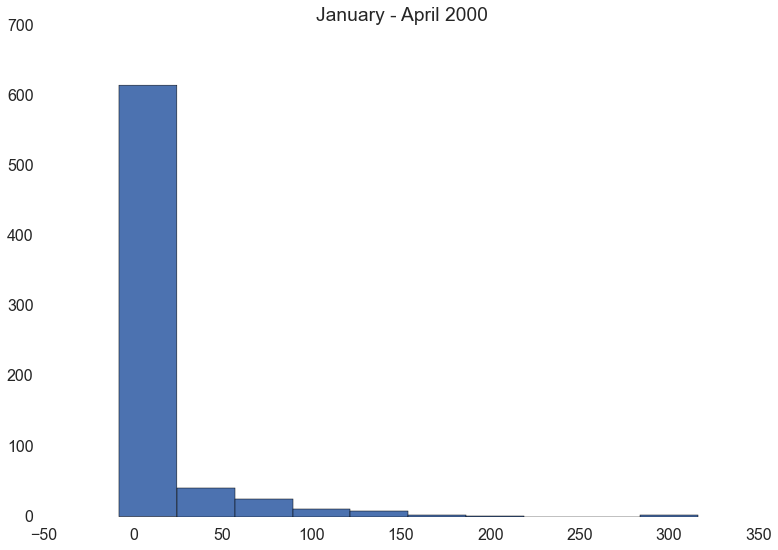

In [50]:
plt.title('January - April 2000')
plt.hist(FirstFourMonths)
plt.show()

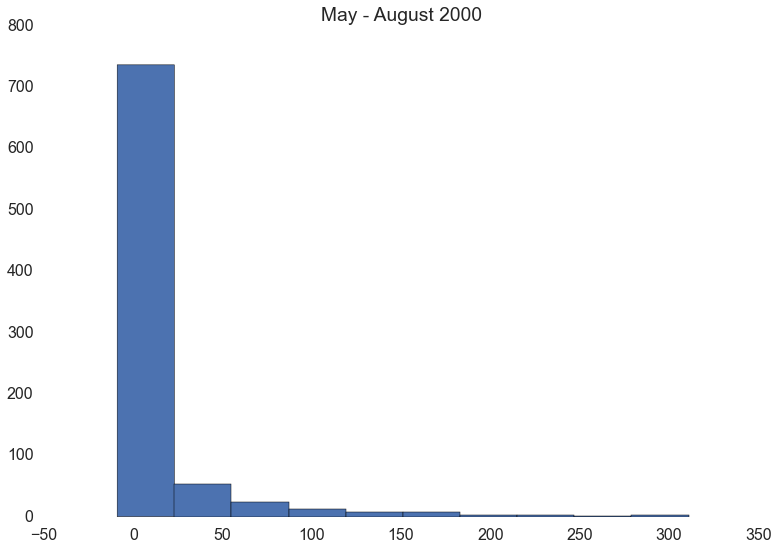

In [51]:
plt.title('May - August 2000')
plt.hist(SecondFourMonths)
plt.show()

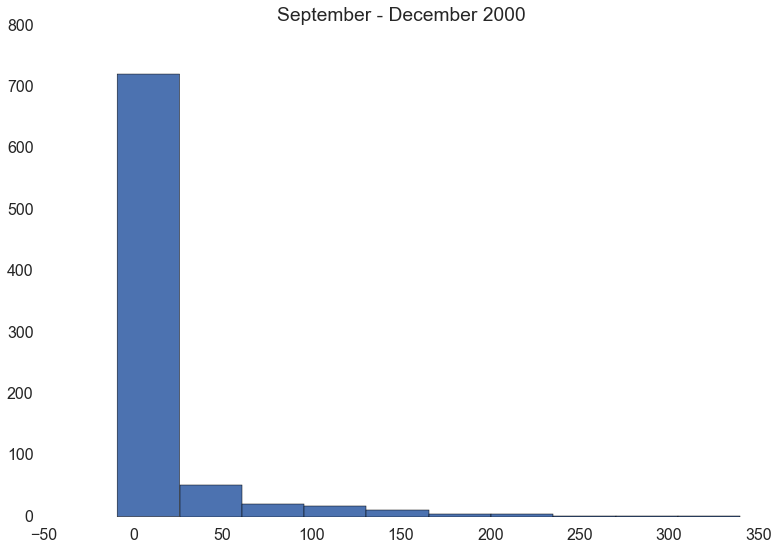

In [52]:
plt.title('September - December 2000')
plt.hist(ThirdFourMonths)
plt.show()

As seen from the results of the above, the only two data sets where it can be confidently confirmed that they come from different distributions are January-April and May-August. In the case of the other tests, the assumption that the distributions are the same is verified more between May-August/September-December because the $p$ -value for  January-April/September-December is much smaller; however, since $p\nless\alpha$, the null hypothesis is not disproven.

As for some means of interpretation of the results, it seems as though the data supports the thought that the length of delays is most irregular during the first four months of the year.

## Hypothesis Test 2: Wilcoxon Sum of Ranks Test

Similarly to how it is used above, the Wilcoxon Sum of Ranks Test will help determine whether or not the two data sets in question are from the same distribution. In this case, the two data sets are length of flight delays from flights before 9/11 and that of flights after 9/11. The goal is to see if the tragedy of 9/11 at all had a long-term impact on flight delays from JFK international airport.

In [54]:
data_part2 = pd.read_excel('Flight Delays Part 2.xlsx')
for i in data_part2.columns:
    print '\'{}\''.format(i)

'Date (Before 9/11)'
'Departure Delay (Before 9/11)'
'Date(After 9/11)'
'Departure Delay (After 9/11)'


In [59]:
before = np.array(data_part2['Departure Delay (Before 9/11)'])
after = np.array(data_part2['Departure Delay (After 9/11)'])

sumOfRanks(before, after)

With a p value of  0.77037618098 , the null hypothesis is supported, and it can be assumed that the two sets of data come from the same distribution.


0.77037618097994065

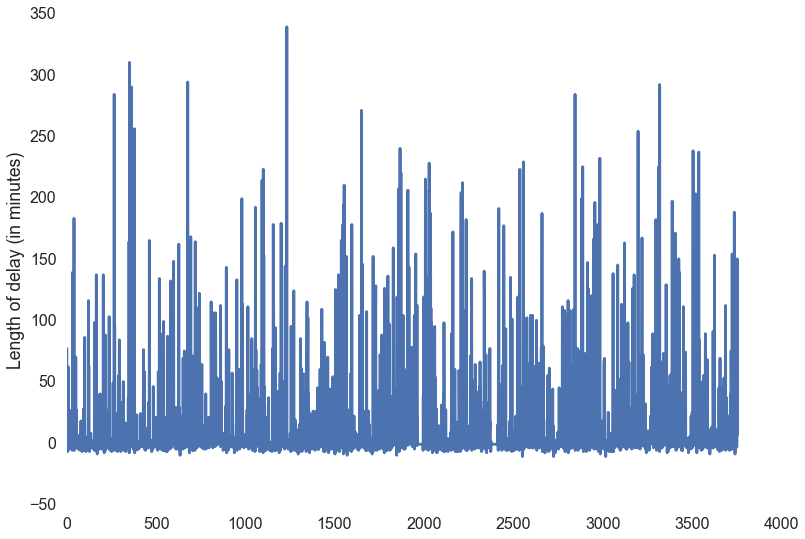

In [67]:
plt.plot(range(len(before)), before)
plt.ylabel('Length of delay (in minutes)')
plt.show()

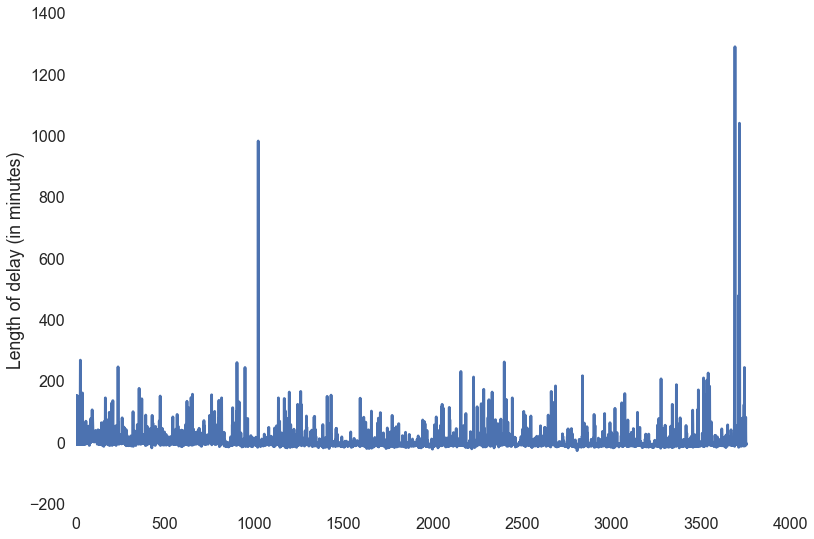

In [69]:
plt.plot(range(len(after)), after)
plt.ylabel('Length of delay (in minutes)')
plt.show()

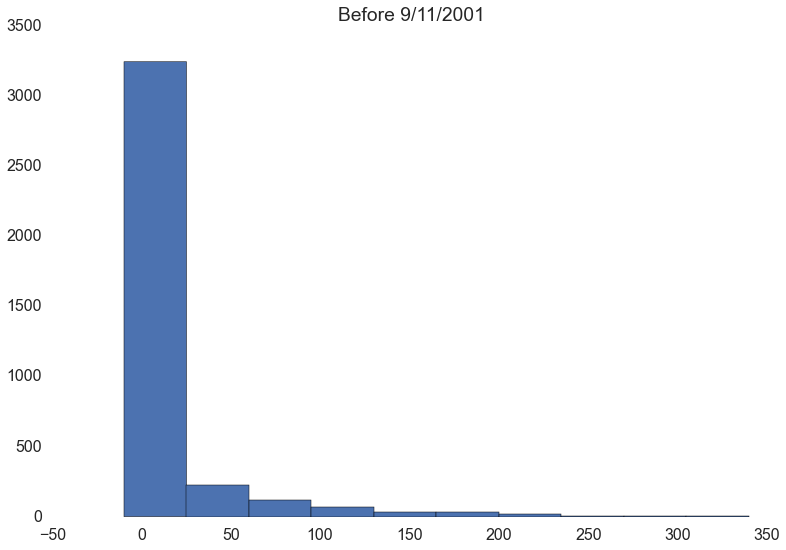

In [70]:
plt.title('Before 9/11/2001')
plt.hist(before)
plt.show()

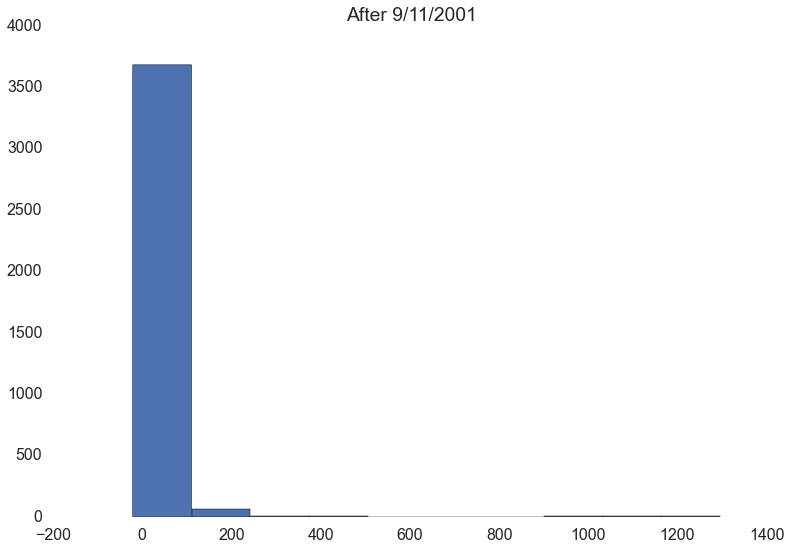

In [71]:
plt.title('After 9/11/2001')
plt.hist(after)
plt.show()

##Determining the Distribution
Here we can test to see if the data collected is normally distributed. We shall test the set of data from before 9/11 to see if the amount of time a flight is delayed is normally distributed. To test this, a Shapiro-Wilk test is performed where the **null hypothesis** is that the data is normally distributed.

The **Shapiro-Wilk test** calculates a $W$ statistic using the following formula:

$$W = \frac{\bigg{(}\sum_{i=1}^n{a_i x_i}\bigg{)}^2}{\sum_{i=1}^n{(x_i - \bar{x})^2}}$$

Where $x_i$ are the ordered sample values ($x_1$ is the smallest, and $x_n$ is the largest), and $a_i$ are constants that are derived from a combination of the mean, variance and covariance of a normal statistic of size $n$

**Normal Distributions** have a probability desity function ( $p(x)$ ) of:

$$p(x) = \frac{1}{\sqrt{2\sigma^2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Where $\sigma^2 = $ variance, and $\mu = $ mean



In [73]:
alpha = 0.05
p = st.shapiro(before)[1]
if p < alpha:
    print 'With a p value of ', p, 'we can confidently reject the null hypothesis and conclude that the data is not normally distributed.'
else:
    print 'With a p value of ', p, 'we can not conclude anything, but we can assume that the data is normally distributed.'
np.random.exponential()    

With a p value of  0.0 we can confidently reject the null hypothesis and conclude that the data is not normally distributed.


Since the data is not normally distributed, by the looks of the graph the data might perhaps be exponentially distributed. In order to determine this, it is possible to compare the given data to a randomly generated exponential distribution. By doing that, the two can be compared through a Wilcoxon Sum of Ranks test to see if they share the same parent distribution.

The probability density function for an exponential distribution is given by:

$$p(x) = \lambda e^{-\lambda x}$$

Where $\lambda = \frac{1}{\mu}$, and $\mu = $ mean

In [80]:
randomExponential = np.random.exponential(1, 10000) #generates 100 random points on an exponential distribution with lambda = 1

sumOfRanks(randomExponential, FirstFourMonths)

With a p value of  3.82880593011e-24 , the null hypothesis is rejected, and therefore the two sets of data come from different distributions.


3.828805930114687e-24

From this information we can conclude that the data is neither normally distributed nor exponentially distributed.

##Data

All of the information used in this project comes from the source http://apps.bts.gov/xml/ontimesummarystatistics/src/index.xml.

The data was compiled from multiple spreadsheets into only two spreadsheets *Flight Delays Part 1.xlsx* and *Flight Delays Part 2.xlsx*. All of which can be found in the project's folder.

As stated previously, American Airlines was chosen arbitrarily as the airline to observe. This is mainly because it was clear that American Airlines had numerous flights into and out of JFK international airport. However, the flights were entirely domestic.

JFK international airport was chosen as the airport to focus on because it is the largest international airport operating out of the New York area. As a result, it became possible to observe the effects of 9/11 on flight delays if any at all.

Also, the dates chosen were roughly every 5 days from January 2000 to December 2002 because this provided for enough substantial information to cover a span of three full years.

Finally, information about the Shapiro-Wilk test was found at http://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm.

All other equations/information came from lecture notes/slides.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn
seaborn.set_context("poster")